In [73]:
%reload_ext autoreload
%autoreload 2
from archive import pipeline
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [104]:
df = pipeline.load_data()

In [5]:
plot_var = df['eviction-rate']

In [109]:
df['eviction-rate'].describe()

count     27889.000000
mean         57.509008
std        4422.867253
min           0.000000
25%           1.740000
50%           3.640000
75%           6.980000
max      600000.100000
Name: eviction-rate, dtype: float64

## Plots of Eviction Rate by Year per GEOID with Null Values

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


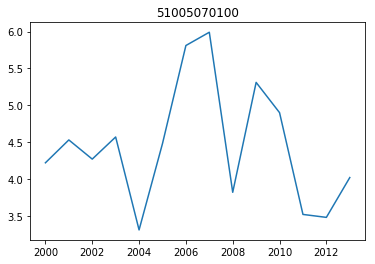

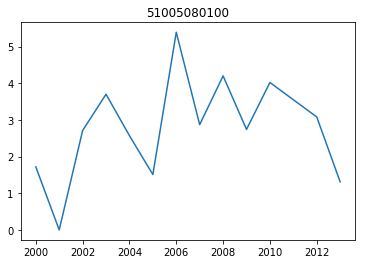

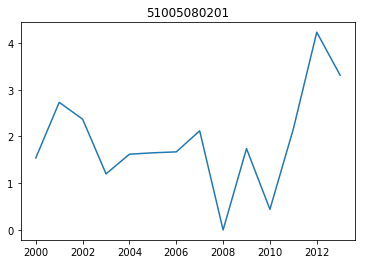

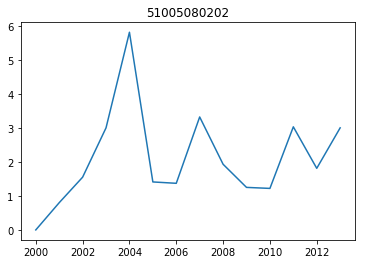

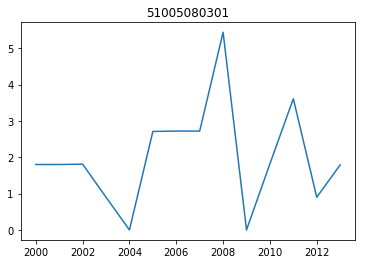

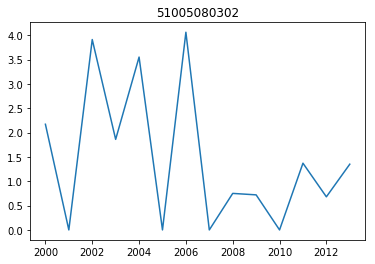

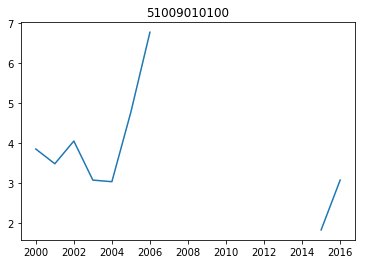

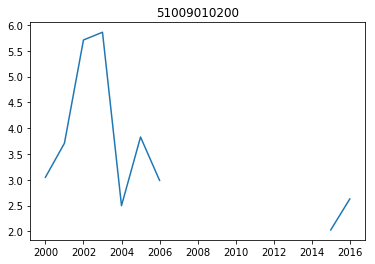

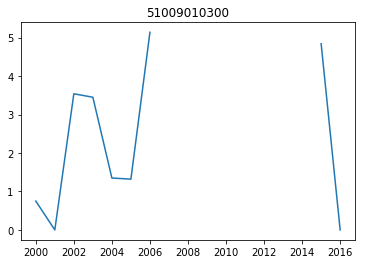

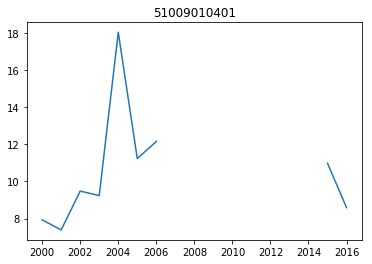

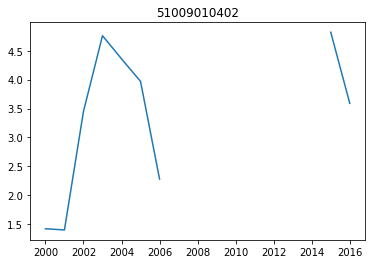

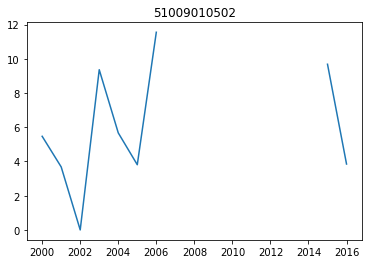

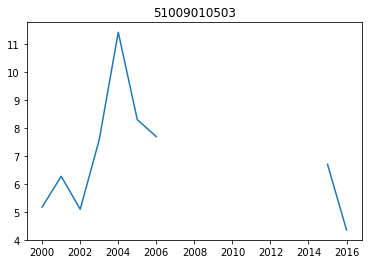

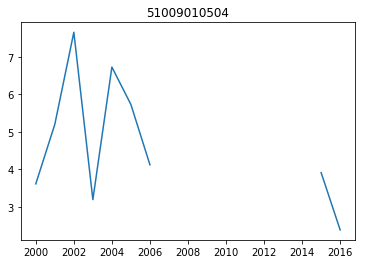

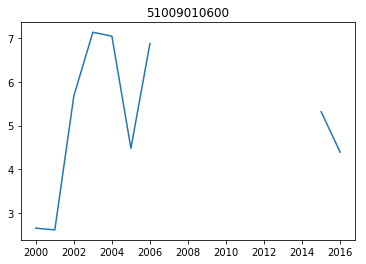

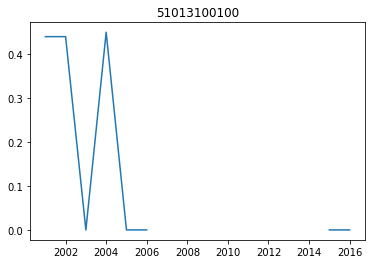

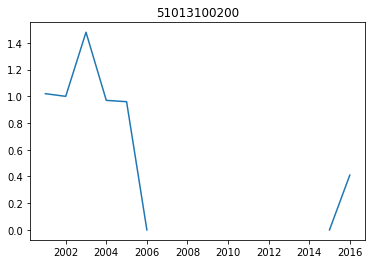

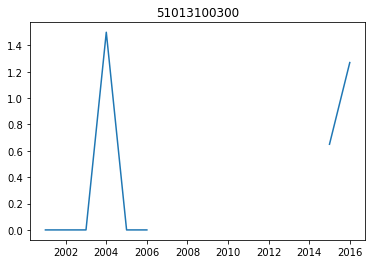

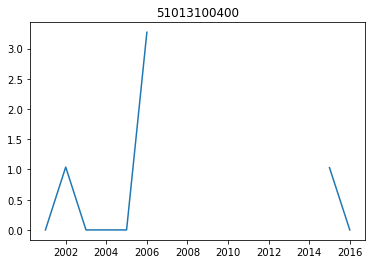

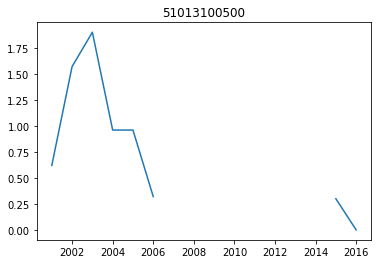

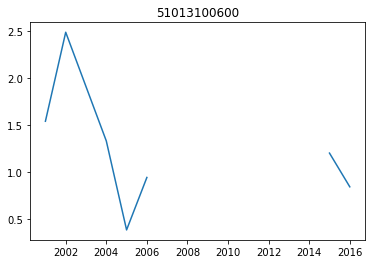

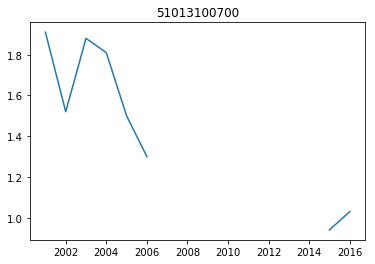

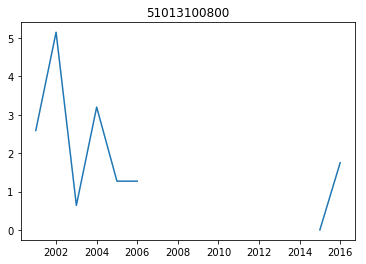

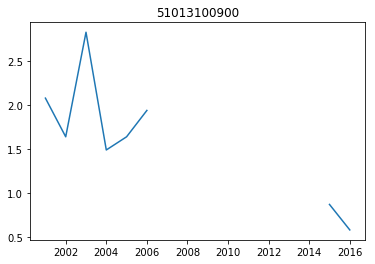

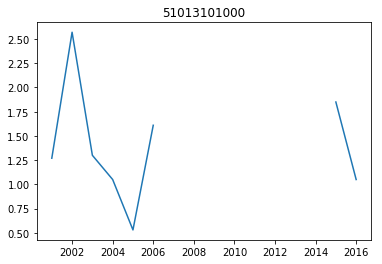

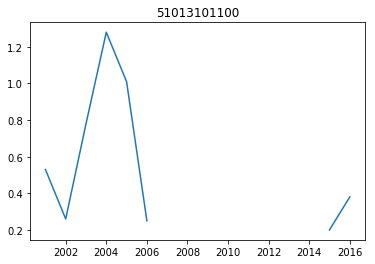

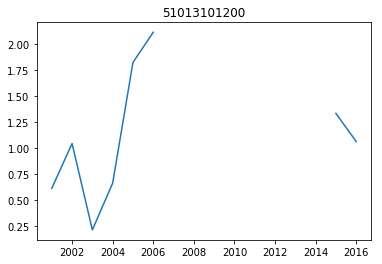

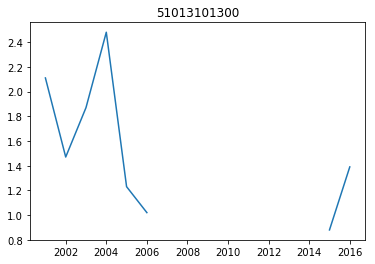

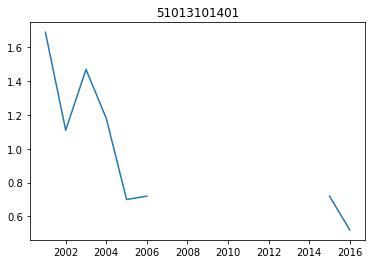

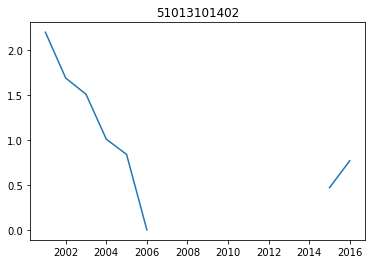

In [102]:
NAN_GEOIDS = df[df['eviction-rate'].isna()].GEOID.unique()
for x in NAN_GEOIDS[:30]:
    tst = df[df['GEOID'] == x]
    plt.figure()
    plt.plot(tst['year'], tst['eviction-rate'])
    plt.title(x)

## Columns with Number of Missing Values

In [107]:
df.isnull().sum(axis=0)

GEOID                            0
year                             0
name                             0
parent-location                  0
population                       6
poverty-rate                     6
renter-occupied-households       6
pct-renter-occupied              6
median-gross-rent              492
median-household-income        282
median-property-value          486
rent-burden                    425
pct-white                        6
pct-af-am                        6
pct-hispanic                     6
pct-am-ind                       6
pct-asian                        6
pct-nh-pi                        6
pct-multiple                     6
pct-other                        6
eviction-filings              4536
evictions                     4536
eviction-rate                 4536
eviction-filing-rate          4536
low-flag                         0
imputed                          0
subbed                           0
dtype: int64

## Plots of Eviction Rate by Year per GEOID with at least 1 year ER = 0

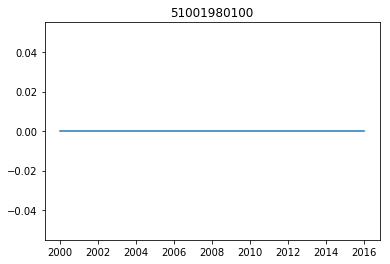

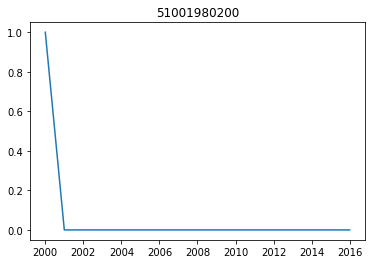

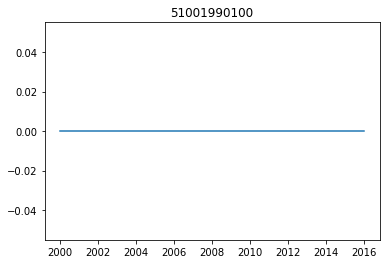

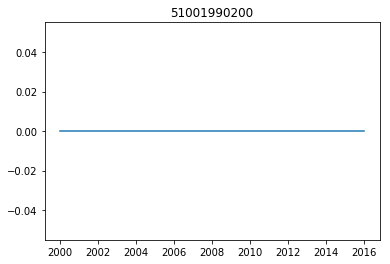

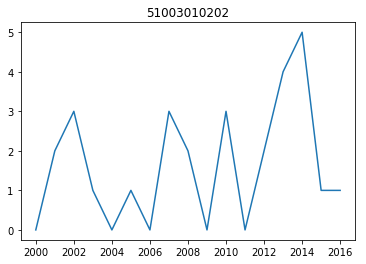

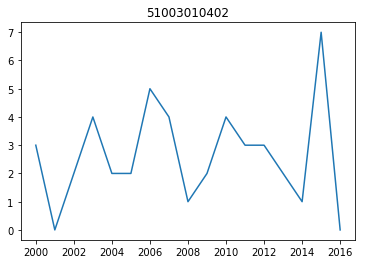

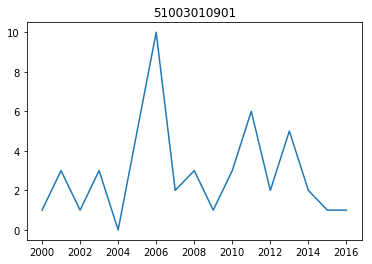

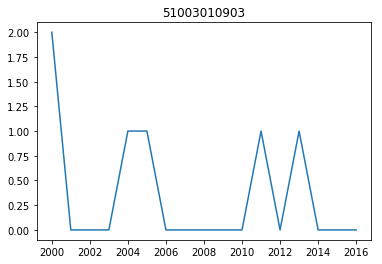

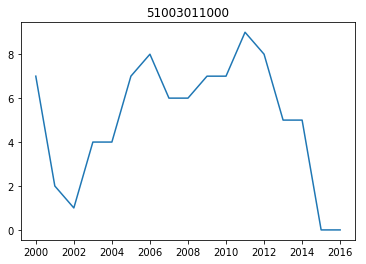

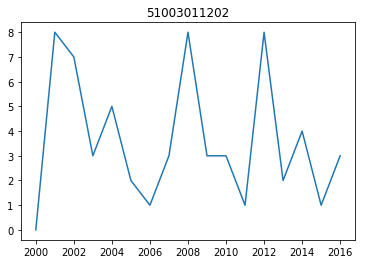

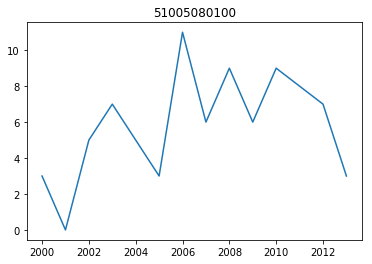

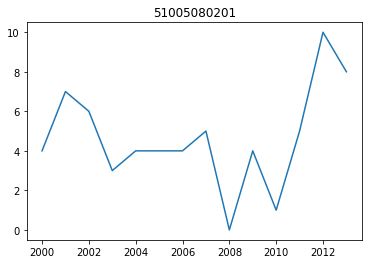

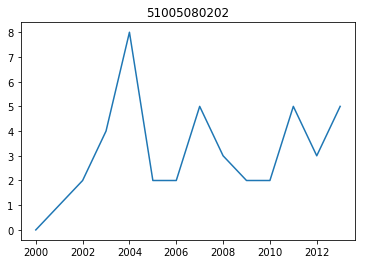

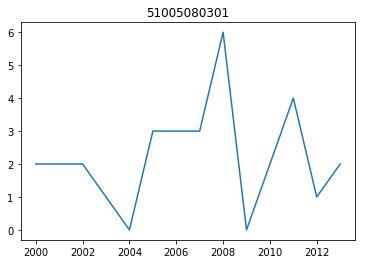

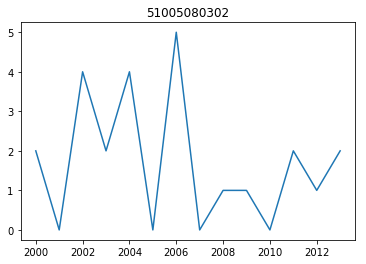

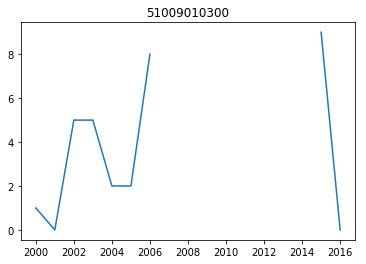

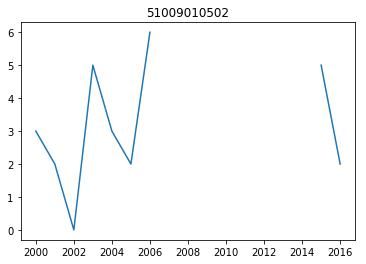

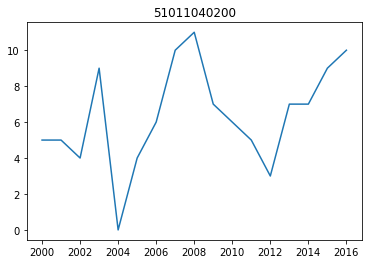

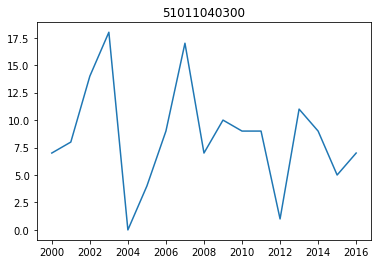

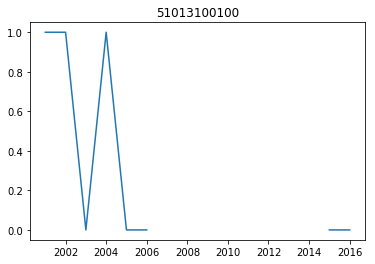

In [122]:
GEOIDS = df[df['eviction-rate'] == 0].GEOID.unique()

for x in GEOIDS[:20]:
    tst = df[df['GEOID'] == x]
    plt.figure()
    plt.plot(tst['year'], tst['evictions'])
    plt.title(x)
    

#### Data Investigation -- Do zeros represent NaN's? 
The table below represents records that have had an eviction-rate of zero for at least one year. Given that majority have small populations (which can result in large values for eviction-rate), I wanted to see whether or not there are GEOIDs large absolute numbers of evictions -- if so, this could mean that an eviction-rate of zero is mislabeled and should actually be NaN. When looking into the table below, it's hard to say if this is the case. There are large values for eviction-rate, but the total number of evictions remains low in comparison to larger tracts. Is it reasonable to expect no evictions for a given tract one year and then ~20 the next? 

In [127]:
df[(df.GEOID.isin(GEOIDS)) & (df['evictions'] > 10)]

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
601,51005080100,2006,801.00,"Alleghany County, Virginia",3500.90,3.24,204.0,13.77,497.28,42099.52,...,0.00,0.23,0.30,24.0,11.0,5.39,11.75,0,0,0
892,51011040200,2008,402.00,"Appomattox County, Virginia",4597.00,5.18,212.0,12.19,496.00,53198.00,...,0.00,0.00,0.00,11.0,11.0,5.18,5.18,0,0,0
903,51011040300,2002,403.00,"Appomattox County, Virginia",4137.77,8.78,282.0,17.61,404.00,36086.00,...,0.00,0.46,0.02,14.0,14.0,4.96,4.96,0,0,0
904,51011040300,2003,403.00,"Appomattox County, Virginia",4137.77,8.78,285.0,17.61,404.00,36086.00,...,0.00,0.46,0.02,18.0,18.0,6.31,6.31,0,0,0
908,51011040300,2007,403.00,"Appomattox County, Virginia",3868.78,12.16,298.0,21.47,489.00,49896.00,...,0.00,0.00,0.00,18.0,17.0,5.71,6.05,0,0,0
914,51011040300,2013,403.00,"Appomattox County, Virginia",4180.00,18.89,331.0,12.79,700.00,48849.00,...,0.00,1.05,0.00,16.0,11.0,3.33,4.84,0,0,0
1157,51013101402,2001,1014.02,"Arlington County, Virginia",2473.00,5.63,592.0,69.22,1256.00,71463.00,...,0.07,2.54,0.25,21.0,13.0,2.20,3.55,0,0,0
1993,51015070500,2004,705.00,"Augusta County, Virginia",4614.91,5.84,243.0,9.59,527.90,42710.29,...,0.02,0.63,0.02,17.0,12.0,4.93,6.99,0,0,0
1995,51015070500,2006,705.00,"Augusta County, Virginia",4652.84,1.42,278.0,11.01,722.84,47104.64,...,1.40,0.00,0.00,33.0,17.0,6.10,11.85,0,0,0
1997,51015070500,2008,705.00,"Augusta County, Virginia",4652.84,1.42,314.0,11.01,722.84,47104.64,...,1.40,0.00,0.00,12.0,11.0,3.51,3.82,0,0,0


### Rent Distribution

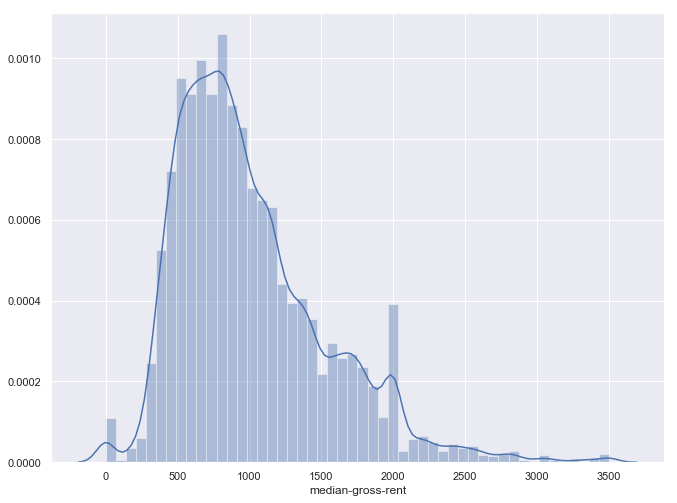

In [147]:
sns.set(rc={'figure.figsize':(11.0,8.27)})
plot_var = df['median-gross-rent']
sns.distplot(plot_var[~plot_var.isnull()], kde = True, rug = False)

### Property Value

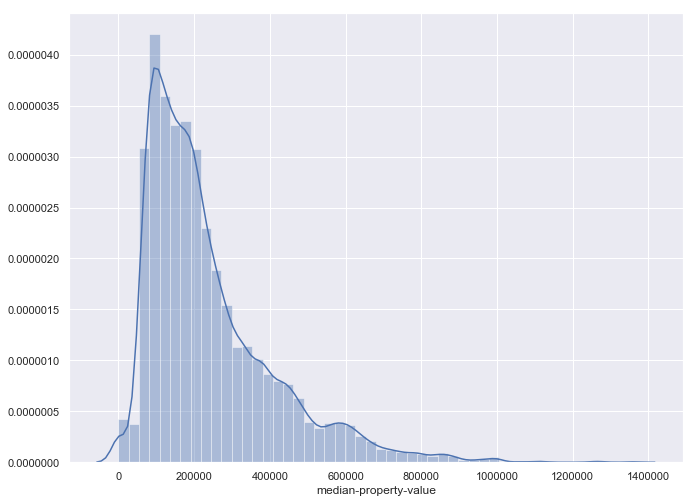

In [165]:
plot_var = df['median-property-value']
sns.distplot(plot_var[~plot_var.isnull()], kde = True, rug = False)

### Distribution of Evictions by Property Value Buckets

In [167]:
df['prop-value-discrete'] = pd.qcut(df['median-property-value'], 5)

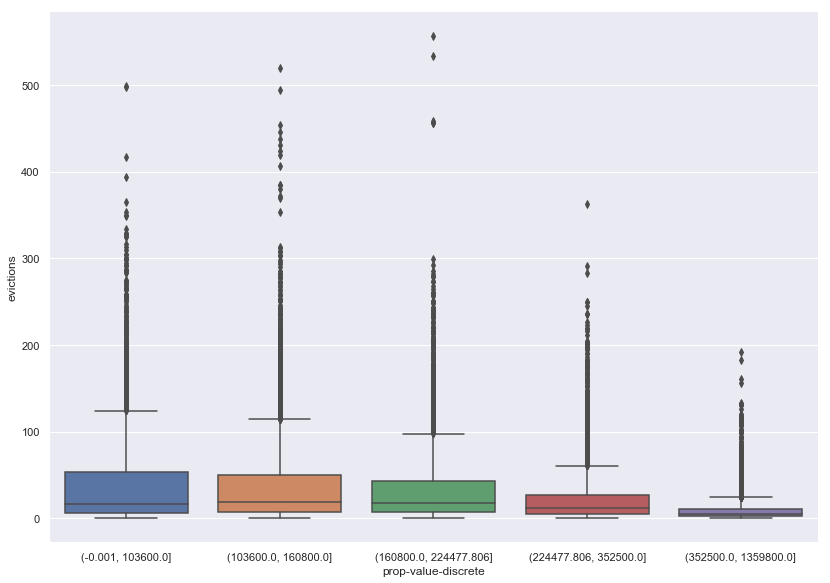

In [172]:
sns.catplot(data=df[df['eviction-rate'] < 200], x="prop-value-discrete", y='evictions', kind='box', height=8.27, aspect=11.7/8.27)

### Distribution of Eviction Rate by GEOID

In [162]:
unique_vals = df['GEOID'].unique()
targets = [df.loc[(df['GEOID'] == val) & (df['eviction-rate'] < 300)] for val in unique_vals]

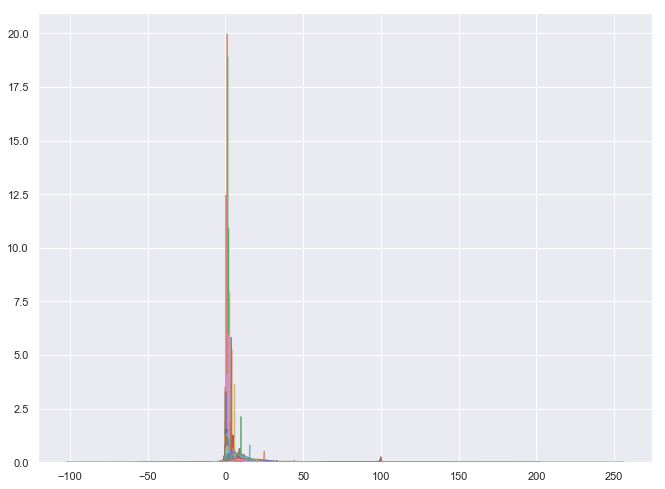

In [164]:
for target in targets:
    sns.distplot(target[['eviction-rate']], hist=False, rug=False)

# sns.plt.show()

### Distribution of Eviction Rate by Year

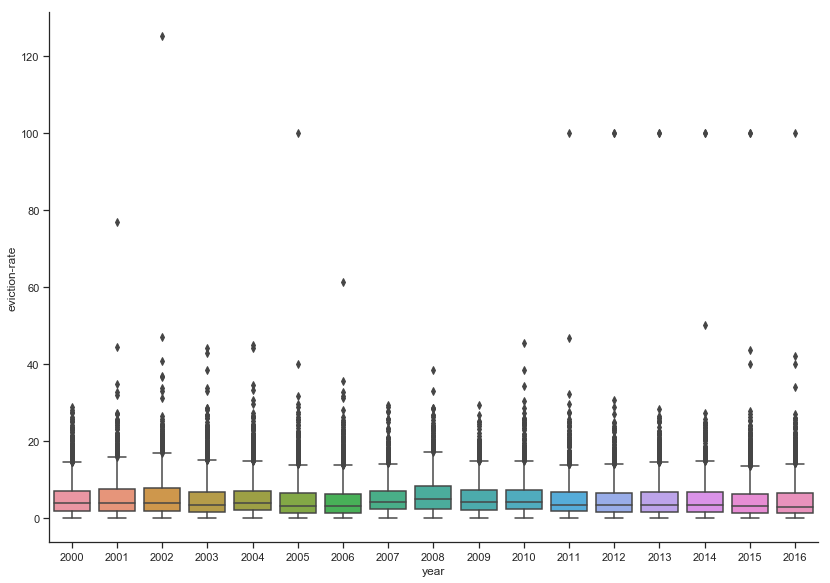

In [145]:
sns.set_style('ticks')
# fig, ax = plt.subplots()
# sns.set_size_inches(11.7, 8.27)
sns.catplot(data=df[df['eviction-rate'] < 200], x="year", y='eviction-rate', kind='box', height=8.27, aspect=11.7/8.27)
